(k, hata)
(1, np.float64(0.39607843137254906))
(2, np.float64(0.38431372549019605))
(3, np.float64(0.3019607843137255))
(4, np.float64(0.3176470588235294))
(5, np.float64(0.30980392156862746))
(6, np.float64(0.33333333333333326))
(7, np.float64(0.2941176470588236))
(8, np.float64(0.34901960784313724))
(9, np.float64(0.33333333333333326))
(10, np.float64(0.34509803921568627))
(11, np.float64(0.32156862745098036))
(12, np.float64(0.3372549019607842))
(13, np.float64(0.33333333333333326))
(14, np.float64(0.3529411764705882))
(15, np.float64(0.3529411764705883))
(16, np.float64(0.3647058823529412))
(17, np.float64(0.3529411764705883))
(18, np.float64(0.3686274509803922))
(19, np.float64(0.37254901960784315))
(20, np.float64(0.3921568627450981))
(21, np.float64(0.3803921568627452))
(22, np.float64(0.4))
(23, np.float64(0.3686274509803922))
(24, np.float64(0.3803921568627451))
(25, np.float64(0.3568627450980393))
En iyi k: 7
Min hata: 0.2941
Test Accuracy: 67.19 %


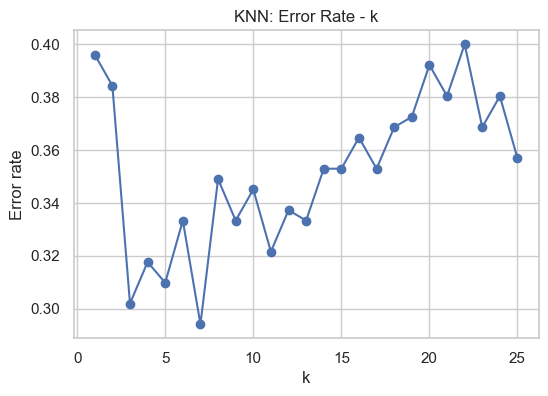

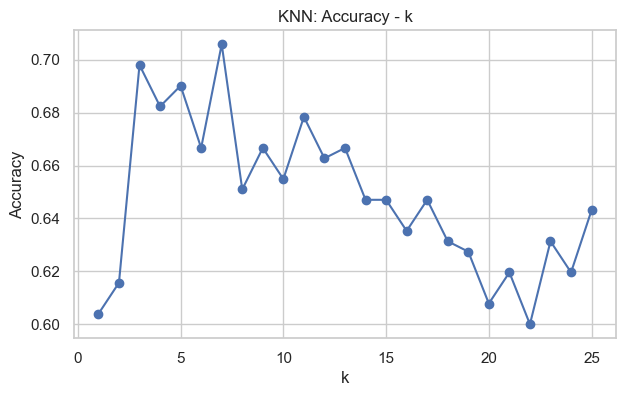

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("dataset-uci.csv", sep=None, engine="python")
df.columns = df.columns.str.replace("\ufeff", "")

hedef_kolon  = "Gallstone Status"

encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = encoder.fit_transform(df[col].astype(str))

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for k in range(1, 26):
    model = Pipeline([
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    error = 1 - scores.mean()
    results.append((k, error))

print("(k, hata)")
for item in results:
    print(item)

best_k, min_error = min(results, key=lambda x: x[1])
print("En iyi k:", best_k)
print("Min hata:", round(min_error, 4))

final_model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", round(test_acc * 100, 2), "%")

import matplotlib.pyplot as plt

ks = [r[0] for r in results]
errors = [r[1] for r in results]

plt.figure(figsize=(6,4))
plt.plot(ks, errors, marker="o")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.title("KNN: Error Rate - k")
plt.grid(True)
plt.show()

k_vals = [x[0] for x in results]
acc_vals = [1 - x[1] for x in results]

plt.figure(figsize=(7,4))
plt.plot(k_vals, acc_vals, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy - k")
plt.grid(True)
plt.show()



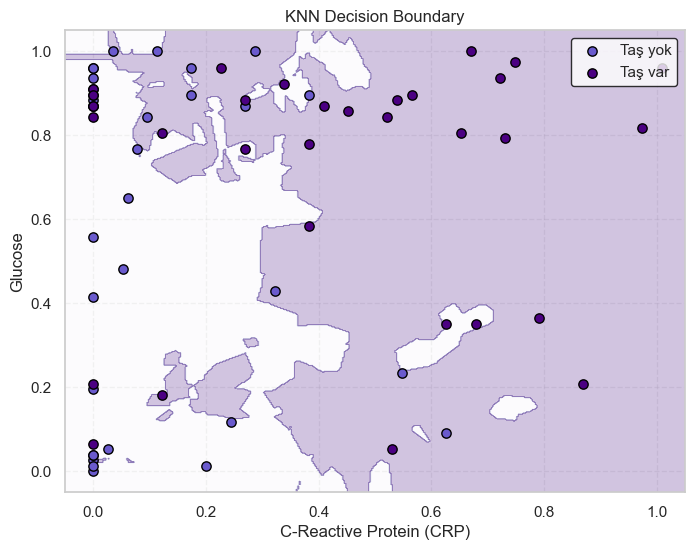

In [49]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

X2 = df[["C-Reactive Protein (CRP)", "Glucose"]].values
y2 = df[hedef_kolon].values

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train)
X2_test = scaler.transform(X2_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X2_train, y2_train)

x_min, x_max = X2_train[:, 0].min() - 0.05, X2_train[:, 0].max() + 0.05
y_min, y_max = X2_train[:, 1].min() - 0.05, X2_train[:, 1].max() + 0.05

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Purples")

plt.scatter(X2_test[y2_test==0,0], X2_test[y2_test==0,1], c="#6A5ACD", edgecolor="black", s=45, label="Taş yok")
plt.scatter(X2_test[y2_test==1,0], X2_test[y2_test==1,1], c="#4B0082", edgecolor="black", s=45, label="Taş var")

plt.xlabel("C-Reactive Protein (CRP)")
plt.ylabel("Glucose")
plt.title("KNN Decision Boundary")
plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


(feature, hata_artisi_%)
('C-Reactive Protein (CRP)', np.float64(9.412))
('Glucose', np.float64(3.137))
('Diabetes Mellitus (DM)', np.float64(2.745))
('Triglyceride', np.float64(2.745))
('Alkaline Phosphatase (ALP)', np.float64(2.745))
('Glomerular Filtration Rate (GFR)', np.float64(2.353))
('Alanin Aminotransferaz (ALT)', np.float64(1.961))
('Visceral Fat Area (VFA)', np.float64(1.569))
('Low Density Lipoprotein (LDL)', np.float64(1.569))
('High Density Lipoprotein (HDL)', np.float64(1.569))
('Hypothyroidism', np.float64(1.176))
('Hyperlipidemia', np.float64(1.176))
('Obesity (%)', np.float64(1.176))
('Age', np.float64(0.784))
('Body Protein Content (Protein) (%)', np.float64(0.784))
('Visceral Muscle Area (VMA) (Kg)', np.float64(0.784))
('Aspartat Aminotransferaz (AST)', np.float64(0.784))
('Creatinine', np.float64(0.784))
('Height', np.float64(0.392))
('Body Mass Index (BMI)', np.float64(0.392))
('Extracellular Water (ECW)', np.float64(0.392))
('Extracellular Fluid/Total Body Water 

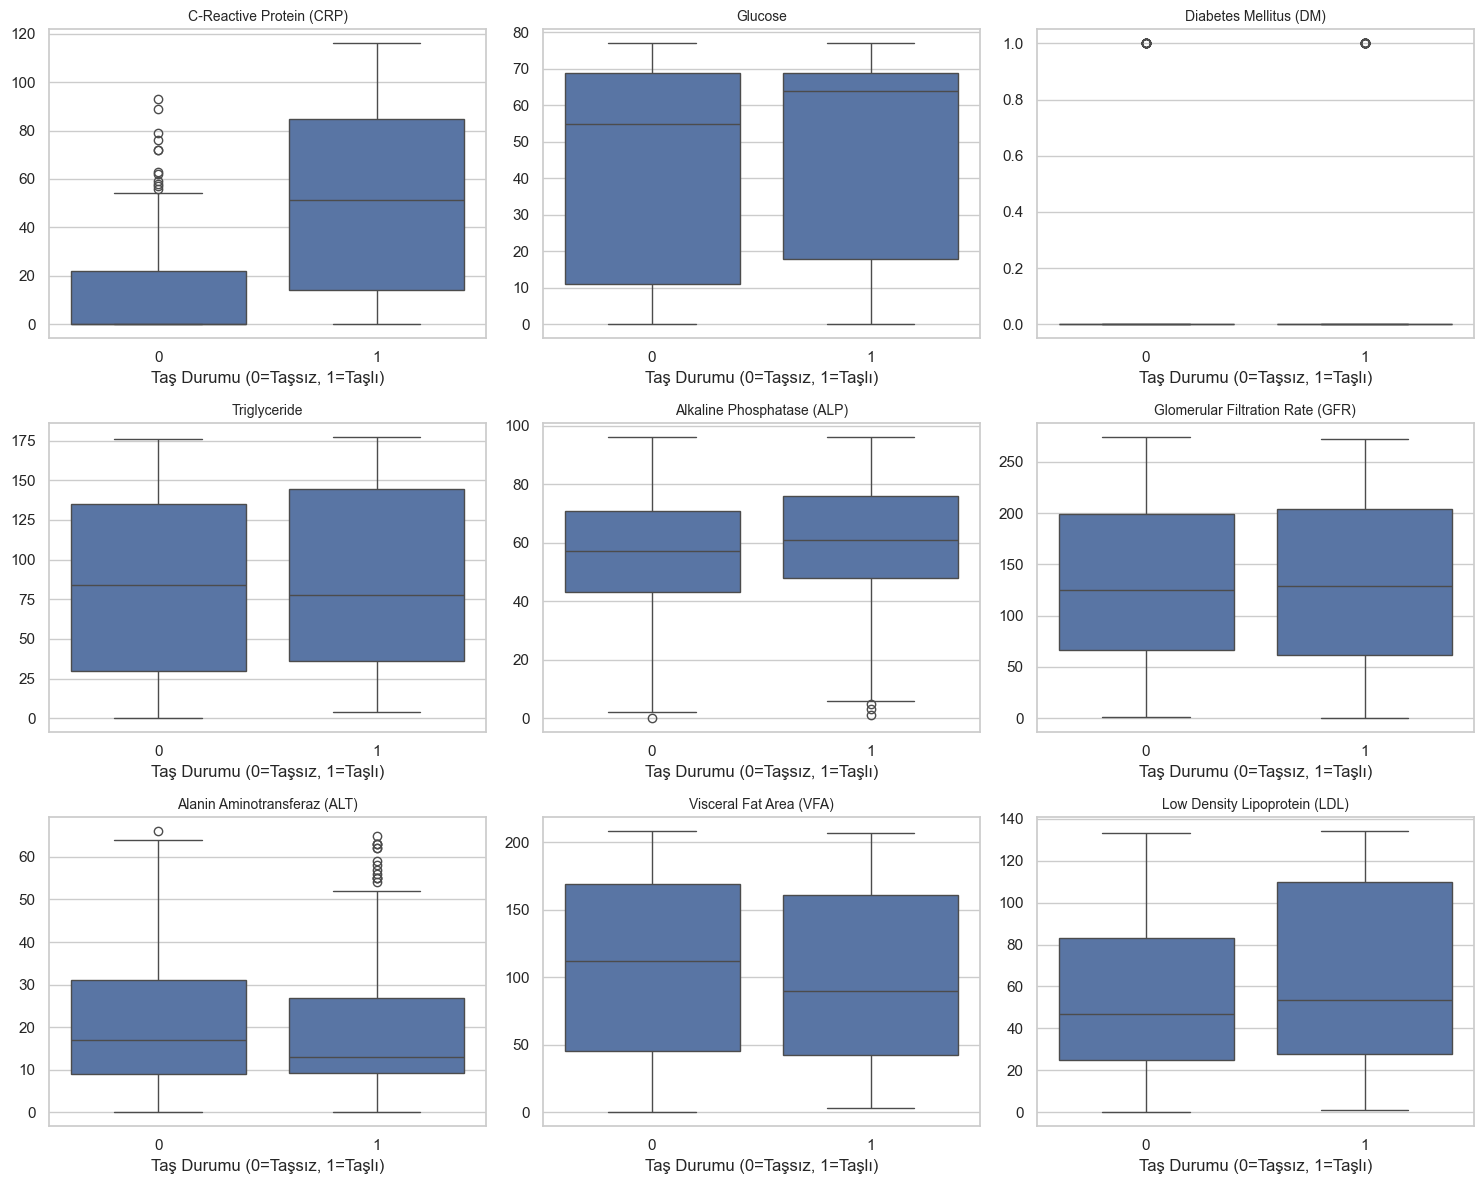

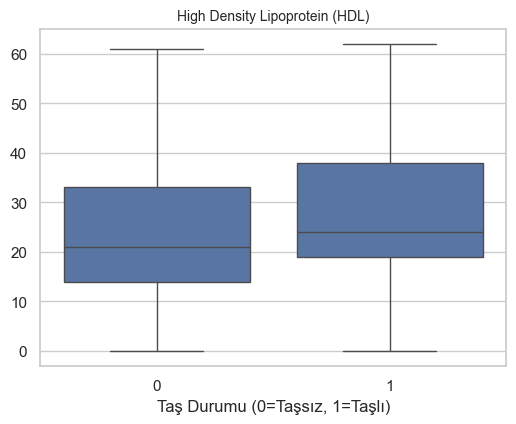

In [50]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base_model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])

base_error = 1 - cross_val_score(base_model, X_train, y_train, cv=cv, scoring="accuracy").mean()

effects = []
for col in X_train.columns:
    m = Pipeline([
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=best_k))
    ])
    err = 1 - cross_val_score(m, X_train.drop(columns=[col]), y_train, cv=cv, scoring="accuracy").mean()
    effects.append((col, round((err - base_error) * 100, 3)))

effects.sort(key=lambda x: x[1], reverse=True)

print("(feature, hata_artisi_%)")
for e in effects:
    print(e)

etkili_featurelar = [f for f, _ in effects[:10]]
df_top = df[etkili_featurelar+ ["Gallstone Status"]]

plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set(style="whitegrid")

for i in range(0, len(etkili_featurelar), 9):
    subset = etkili_featurelar[i:i+9]
    plt.figure(figsize=(15, 12))
    for j, feature in enumerate(subset, 1):
        plt.subplot(3, 3, j)
        sns.boxplot(x="Gallstone Status", y=feature, data=df_top)
        plt.title(feature, fontsize=10)
        plt.xlabel("Taş Durumu (0=Taşsız, 1=Taşlı)")
        plt.ylabel("")
    plt.tight_layout()
    plt.show()


(k, hata)
(1, np.float64(0.3294117647058823))
(2, np.float64(0.3647058823529412))
(3, np.float64(0.3294117647058823))
(4, np.float64(0.33725490196078434))
(5, np.float64(0.34509803921568627))
(6, np.float64(0.34509803921568627))
(7, np.float64(0.3176470588235294))
(8, np.float64(0.34509803921568627))
(9, np.float64(0.32156862745098047))
(10, np.float64(0.30980392156862746))
(11, np.float64(0.29019607843137263))
(12, np.float64(0.3137254901960784))
(13, np.float64(0.2901960784313725))
(14, np.float64(0.3019607843137255))
(15, np.float64(0.2823529411764706))
(16, np.float64(0.2901960784313725))
(17, np.float64(0.2784313725490195))
(18, np.float64(0.2941176470588236))
(19, np.float64(0.29019607843137263))
(20, np.float64(0.28627450980392166))
(21, np.float64(0.29803921568627456))
(22, np.float64(0.2823529411764707))
(23, np.float64(0.2823529411764706))
(24, np.float64(0.2823529411764707))
(25, np.float64(0.2823529411764706))
Seçili feature seti için en iyi k: 17
Min hata: 0.2784
Seçili fe

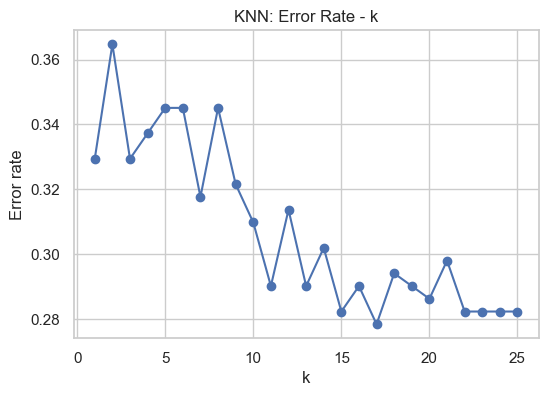

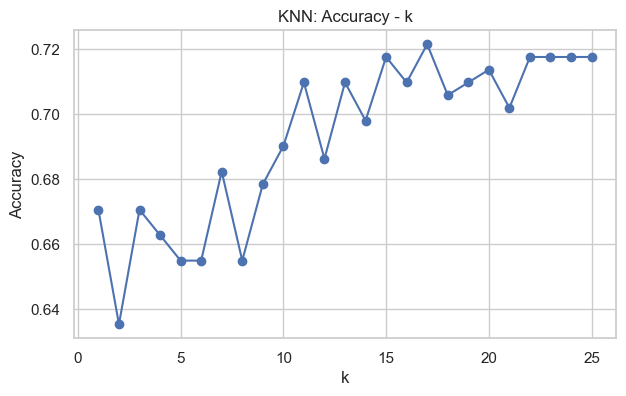

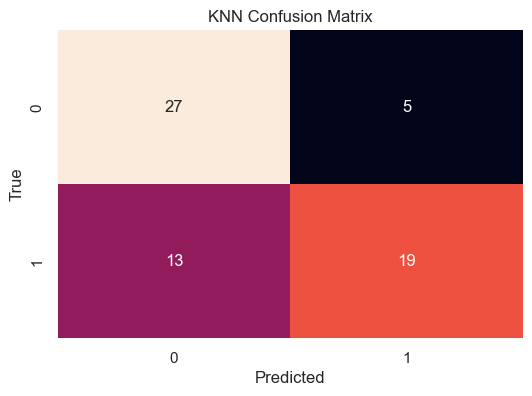

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

seçilen_featurelar = [
    "C-Reactive Protein (CRP)",
    "Glucose",
    "Diabetes Mellitus (DM)",
    "Triglyceride",
    "Alkaline Phosphatase (ALP)",
    "Glomerular Filtration Rate (GFR)",
    "Alanin Aminotransferaz (ALT)",
    "Visceral Fat Area (VFA)",
    "Low Density Lipoprotein (LDL)",
    "High Density Lipoprotein (HDL)",
    "Hypothyroidism",
    "Hyperlipidemia",
]

hedef_kolon = "Gallstone Status"

for col in seçilen_featurelar:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", "."), errors="coerce")
    df[col] = df[col].fillna(df[col].median())

X = df[seçilen_featurelar].copy()
y = df[hedef_kolon ].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.20, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

sonuçlar = []
for k in range(1, 26):
    model = Pipeline([
        ("scaler", MinMaxScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    skor = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    error = 1 - skor .mean()
    sonuçlar.append((k, error))

print("(k, hata)")
for item in sonuçlar:
    print(item)

best_k, min_error = min(sonuçlar, key=lambda x: x[1])
print("Seçili feature seti için en iyi k:", best_k)
print("Min hata:", round(min_error, 4))

final_model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Seçili feature seti ile Test Accuracy: %{round(acc * 100, 2)}")


import matplotlib.pyplot as plt

ks = [r[0] for r in sonuçlar]
errors = [r[1] for r in sonuçlar]

plt.figure(figsize=(6,4))
plt.plot(ks, errors, marker="o")
plt.xlabel("k")
plt.ylabel("Error rate")
plt.title("KNN: Error Rate - k")
plt.grid(True)
plt.show()

k_vals = [x[0] for x in sonuçlar]
acc_vals = [1 - x[1] for x in sonuçlar]

plt.figure(figsize=(7,4))
plt.plot(k_vals, acc_vals, marker="o")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN: Accuracy - k")
plt.grid(True)
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

# Grafik ayarları
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("KNN Confusion Matrix")
plt.show()

# FUTURE SELECTİON DOĞRULUĞU ARTTIRDI.


Accuracy : 0.828125
Precision: 0.8620689655172413
Recall   : 0.78125
F1-score : 0.819672131147541


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

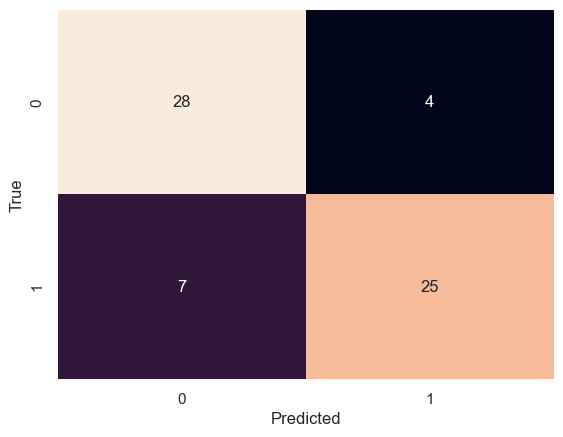

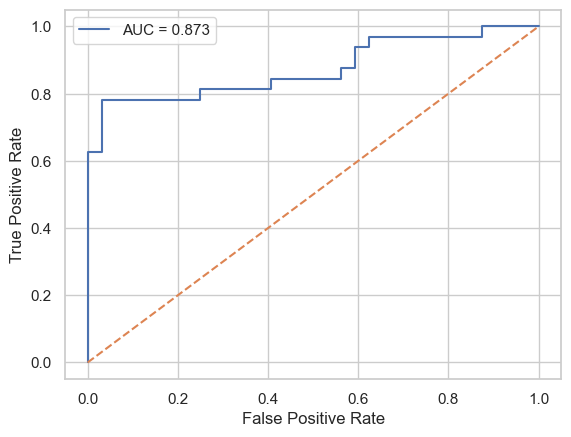

[0.990087 0.99877  0.009043 0.20167  0.048286 0.015913 0.946698 0.940417
 0.284299 0.999434 0.253921 0.543558 0.360931 0.999755 0.067669 0.991052
 0.140162 0.921389 0.267698 0.823379 0.260474 0.445894 0.998002 0.736971
 0.319098 0.585906 0.201792 0.300276 0.165375 0.374539 0.804606 0.240637
 0.990136 0.99955  0.654467 0.263212 0.58637  0.569421 0.998206 0.97888
 0.15068  0.059186 0.007772 0.840837 0.772755 0.045085 0.133504 0.329334
 0.014481 0.709577 0.783248 0.994358 0.145436 0.401361 0.999781 0.090411
 0.082376 0.428732 0.427188 0.994833 0.424387 0.015966 0.705711 0.058495]
                                           Feature  Coefficient
12                       Intracellular Water (ICW)     1.722852
35                        C-Reactive Protein (CRP)     1.599111
5                                   Hyperlipidemia     0.683071
7                                           Height     0.586876
6                           Diabetes Mellitus (DM)     0.354166
0                               

/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


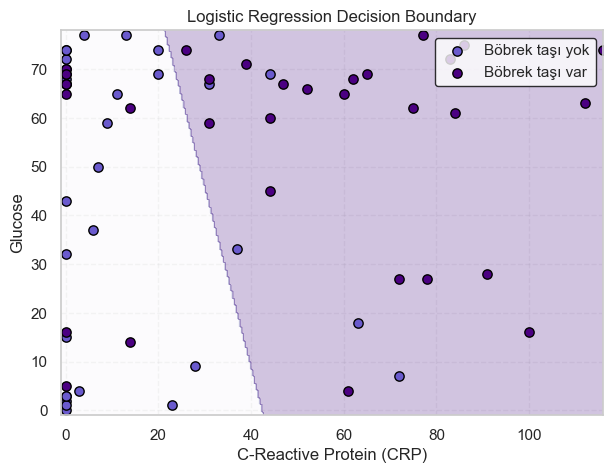

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="lbfgs"))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print(np.round(y_proba, 6))

lr = model.named_steps["lr"]
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_[0]
}).sort_values("Coefficient", ascending=False)

print(coef_df)
print("Intercept:", lr.intercept_)

features_2d = ["C-Reactive Protein (CRP)", "Glucose"]

X2 = df[features_2d]
y2 = df[hedef_kolon]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

model_2d = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000, solver="lbfgs"))
])

model_2d.fit(X2_train, y2_train)

x_min, x_max = X2_train.iloc[:, 0].min() - 1, X2_train.iloc[:, 0].max() + 1
y_min, y_max = X2_train.iloc[:, 1].min() - 1, X2_train.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_2d)
Z = model_2d.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Purples")

m0 = (y2_test == 0)
m1 = (y2_test == 1)

plt.scatter(
    X2_test.loc[m0, features_2d[0]], X2_test.loc[m0, features_2d[1]],
    c="#6A5ACD", edgecolor="black", s=45, label="Böbrek taşı yok"
)
plt.scatter(
    X2_test.loc[m1, features_2d[0]], X2_test.loc[m1, features_2d[1]],
    c="#4B0082", edgecolor="black", s=45, label="Böbrek taşı var"
)

plt.xlabel("C-Reactive Protein (CRP)")
plt.ylabel("Glucose")
plt.title("Logistic Regression Decision Boundary")
plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("rfe", RFE(
        estimator=LogisticRegression(max_iter=1000, solver="lbfgs"),
        n_features_to_select=10
    )),
    ("lr", LogisticRegression(max_iter=1000, solver="lbfgs"))
])

model.fit(X_train, y_train)

seçilen_featurelar = X.columns[model.named_steps["rfe"].support_]
print("Seçilen feature'lar:")
print(list(seçilen_featurelar))

y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# LOJİSTİK REGRESYON İÇİN FEATURE SELECTİON GEREKSİZ.DOĞRULUK ORANI DÜŞÜYOR.AMA YİNE DE KOD OLARAK TUTUYORUM.


Seçilen feature'lar:
['Gender', 'Hyperlipidemia', 'Body Mass Index (BMI)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Lean Mass (LM) (%)', 'Bone Mass (BM)', 'Aspartat Aminotransferaz (AST)', 'C-Reactive Protein (CRP)']
Test Accuracy: 0.78125


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

SVM Test Accuracy: 76.56 %


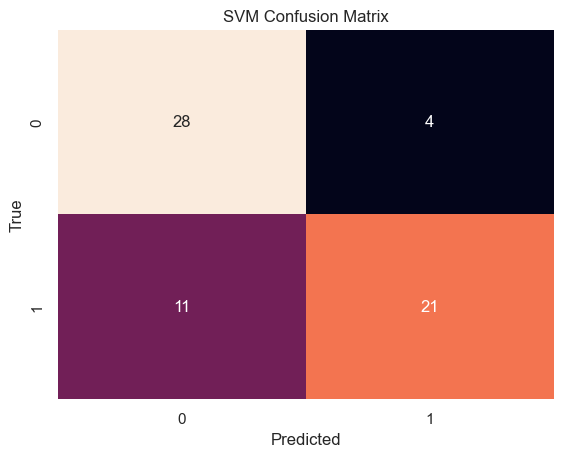

Precision: 0.84
Recall   : 0.65625
F1-score : 0.7368421052631579


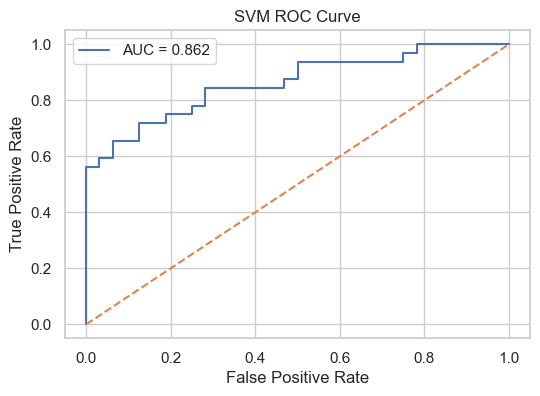

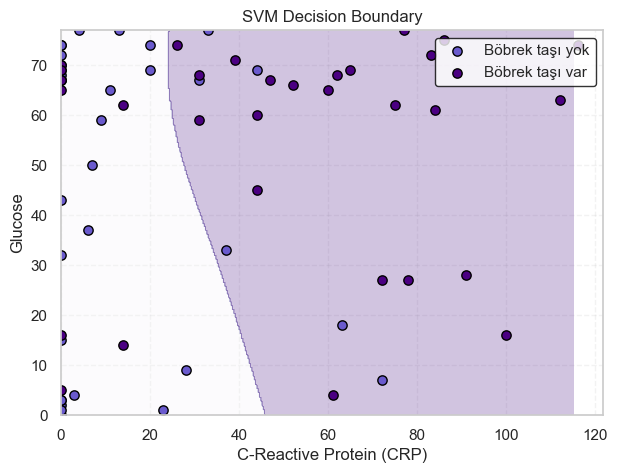

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import numpy as np

svm_model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svm", SVC(kernel="rbf", C=1, gamma="scale", probability=True))
])

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
print("SVM Test Accuracy:", round(svm_acc * 100, 2), "%")

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("SVM Confusion Matrix")
plt.show()

print("Precision:", precision_score(y_test, y_pred_svm, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_svm, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_svm, zero_division=0))

y_proba_svm = svm_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba_svm)
fpr, tpr, _ = roc_curve(y_test, y_proba_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend()
plt.show()

features_2d = ["C-Reactive Protein (CRP)", "Glucose"]

X2 = df[features_2d]
y2 = df[hedef_kolon]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

svm_2d = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svm", SVC(kernel="rbf", C=1, gamma="scale"))
])

svm_2d.fit(X2_train, y2_train)

x_min, x_max = X2_train.iloc[:, 0].min() - 0.05, X2_train.iloc[:, 0].max() + 0.05
y_min, y_max = X2_train.iloc[:, 1].min() - 0.05, X2_train.iloc[:, 1].max() + 0.05

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_2d)
Z = svm_2d.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Purples")

m0 = (y2_test == 0)
m1 = (y2_test == 1)

plt.scatter(
    X2_test.loc[m0, features_2d[0]], X2_test.loc[m0, features_2d[1]],
    c="#6A5ACD", edgecolor="black", s=45, label="Böbrek taşı yok"
)
plt.scatter(
    X2_test.loc[m1, features_2d[0]], X2_test.loc[m1, features_2d[1]],
    c="#4B0082", edgecolor="black", s=45, label="Böbrek taşı var"
)

plt.xlabel("C-Reactive Protein (CRP)")
plt.ylabel("Glucose")
plt.title("SVM Decision Boundary")
plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = df.drop(columns=[hedef_kolon ])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

dt_model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("dt", DecisionTreeClassifier(random_state=42))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("DT Test Accuracy:", round(accuracy_score(y_test, y_pred_dt) * 100, 2), "%")


DT Test Accuracy: 65.62 %


In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=[hedef_kolon ])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("rf", RandomForestClassifier(random_state=42))
])

grid = {"rf__n_estimators": [50, 100, 200, 300, 500, 800]}
gs = GridSearchCV(rf_pipe, grid, cv=cv, scoring="roc_auc", n_jobs=-1)
gs.fit(X_train, y_train)

best_n = gs.best_params_["rf__n_estimators"]
print("Best n_estimators:", best_n)
print("Best CV AUC:", round(gs.best_score_, 4))


Best n_estimators: 200
Best CV AUC: 0.852


Seçilen feature'lar: ['C-Reactive Protein (CRP)', 'Vitamin D', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Visceral Muscle Area (VMA) (Kg)', 'Extracellular Water (ECW)', 'Aspartat Aminotransferaz (AST)', 'Triglyceride', 'Lean Mass (LM) (%)', 'Obesity (%)', 'Body Protein Content (Protein) (%)', 'Hemoglobin (HGB)', 'Low Density Lipoprotein (LDL)', 'Creatinine', 'Bone Mass (BM)', 'Intracellular Water (ICW)', 'Glucose', 'Body Mass Index (BMI)', 'Height', 'Visceral Fat Area (VFA)', 'Age']
Accuracy : 0.796875
Precision: 0.8064516129032258
Recall   : 0.78125
F1-score : 0.7936507936507936


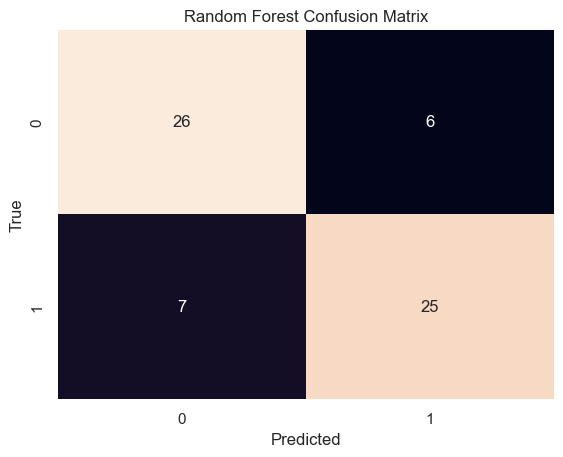

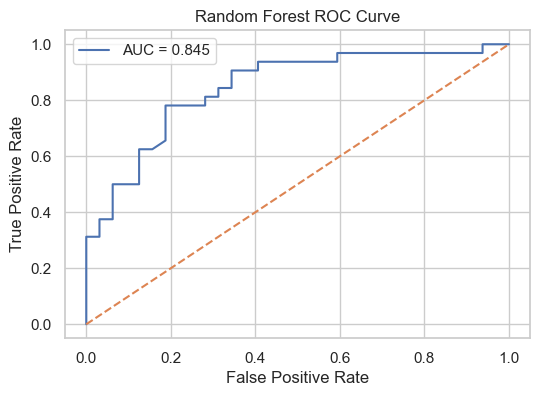

[0.705 0.695 0.23  0.325 0.335 0.055 0.725 0.7   0.265 0.83  0.485 0.73
 0.39  0.915 0.085 0.81  0.515 0.43  0.465 0.53  0.335 0.46  0.89  0.63
 0.17  0.795 0.365 0.2   0.375 0.225 0.61  0.295 0.535 0.895 0.625 0.37
 0.765 0.29  0.93  0.905 0.33  0.57  0.21  0.855 0.68  0.205 0.225 0.245
 0.24  0.36  0.54  0.975 0.19  0.52  0.77  0.315 0.26  0.69  0.54  0.835
 0.315 0.15  0.58  0.31 ]


In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

rf_full = Pipeline([
    ("scaler", MinMaxScaler()),
    ("rf", RandomForestClassifier(n_estimators=best_n, random_state=42))
])
rf_full.fit(X_train, y_train)

imp = rf_full.named_steps["rf"].feature_importances_
top_n = 20
top_features = X_train.columns[np.argsort(imp)[::-1][:top_n]].tolist()

print("Seçilen feature'lar:", top_features)

rf_fs = Pipeline([
    ("scaler", MinMaxScaler()),
    ("rf", RandomForestClassifier(n_estimators=best_n, random_state=42))
])
rf_fs.fit(X_train[top_features], y_train)

y_pred = rf_fs.predict(X_test[top_features])
y_proba = rf_fs.predict_proba(X_test[top_features])[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

print(np.round(y_proba, 6))


Naive Bayes Test Accuracy: 59.38 %
Precision: 1.0
Recall   : 0.1875
F1-score : 0.3157894736842105


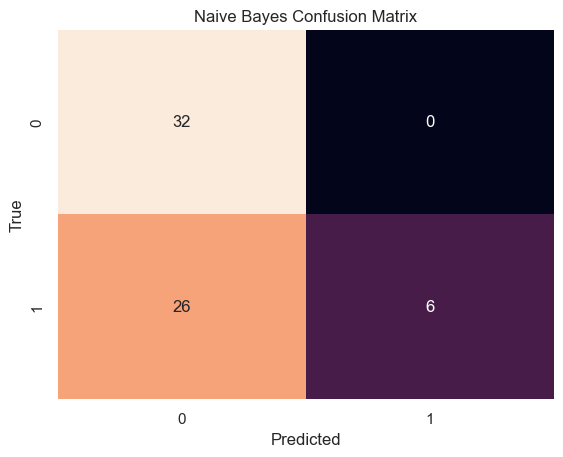

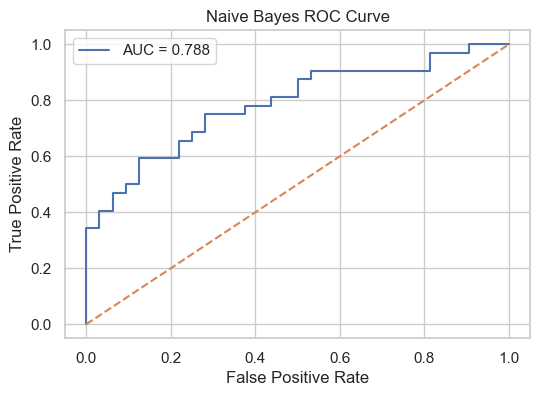

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

nb_model = Pipeline([
    ("scaler", MinMaxScaler()),
    ("nb", GaussianNB())
])

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

print("Naive Bayes Test Accuracy:", round(accuracy_score(y_test, y_pred_nb) * 100, 2), "%")
print("Precision:", precision_score(y_test, y_pred_nb, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_nb, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_nb, zero_division=0))

cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba_nb)
fpr, tpr, _ = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.legend()
plt.show()


Best params: {'subsample': 0.6, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 2, 'learning_rate': 0.2}
Best CV AUC: 0.8643
Accuracy : 0.796875
Precision: 0.8064516129032258
Recall   : 0.78125
F1-score : 0.7936507936507936


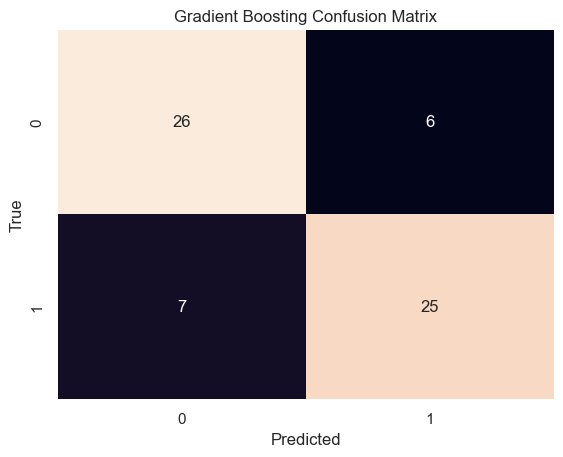

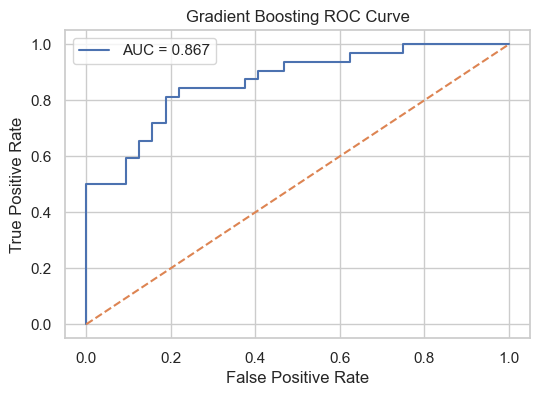

[0.999998 0.999703 0.       0.000989 0.167562 0.000008 0.999997 0.998678
 0.013621 0.999996 0.037044 0.883096 0.004677 1.       0.000012 1.
 0.960633 0.622844 0.014778 0.957368 0.000686 0.661426 1.       0.818159
 0.000059 0.995186 0.015678 0.01258  0.000523 0.066794 0.834155 0.001346
 0.999172 1.       0.584477 0.002205 0.981092 0.037927 0.999997 0.999996
 0.004677 0.148609 0.       0.999848 0.961048 0.       0.000313 0.121483
 0.000019 0.294788 0.981706 0.999999 0.000023 0.150558 1.       0.000402
 0.000003 0.998606 0.984803 0.999998 0.000904 0.000027 0.965972 0.000205]


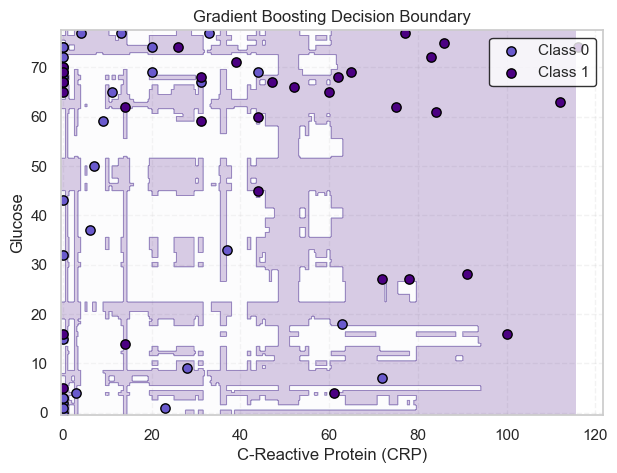

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

X = df.drop(columns=[hedef_kolon ])
y = df[hedef_kolon ]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gb = GradientBoostingClassifier(random_state=42)

param_dist = {
    "n_estimators": [100, 200, 300, 500, 800],
    "learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2],
    "max_depth": [1, 2, 3, 4],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8],
    "subsample": [0.6, 0.8, 1.0],
    "max_features": [None, "sqrt", "log2"]
}

rs = RandomizedSearchCV(
    gb,
    param_distributions=param_dist,
    n_iter=30,
    scoring="roc_auc",
    cv=cv,
    random_state=42,
    n_jobs=-1
)
rs.fit(X_train, y_train)

best_gb = rs.best_estimator_
print("Best params:", rs.best_params_)
print("Best CV AUC:", round(rs.best_score_, 4))

y_pred = best_gb.predict(X_test)
y_proba = best_gb.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Gradient Boosting ROC Curve")
plt.legend()
plt.show()

np.set_printoptions(suppress=True, precision=6)
print(y_proba)


features_2d = ["C-Reactive Protein (CRP)", "Glucose"]

X2 = df[features_2d]
y2 = df[hedef_kolon]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

gb_2d = GradientBoostingClassifier(
    random_state=42,
    n_estimators=rs.best_params_["n_estimators"],
    learning_rate=rs.best_params_["learning_rate"],
    max_depth=rs.best_params_["max_depth"],
    min_samples_split=rs.best_params_["min_samples_split"],
    min_samples_leaf=rs.best_params_["min_samples_leaf"],
    subsample=rs.best_params_["subsample"],
    max_features=rs.best_params_["max_features"]
)
gb_2d.fit(X2_train, y2_train)

x_min, x_max = X2_train.iloc[:, 0].min() - 0.5, X2_train.iloc[:, 0].max() + 0.5
y_min, y_max = X2_train.iloc[:, 1].min() - 0.5, X2_train.iloc[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_2d)
Z = gb_2d.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.22, cmap="Purples")

m0 = (y2_test == 0).to_numpy() if hasattr(y2_test, "to_numpy") else (y2_test == 0)
m1 = (y2_test == 1).to_numpy() if hasattr(y2_test, "to_numpy") else (y2_test == 1)

plt.scatter(
    X2_test.iloc[m0, 0], X2_test.iloc[m0, 1],
    c="#6A5ACD", edgecolor="black", s=45, label="Class 0"
)
plt.scatter(
    X2_test.iloc[m1, 0], X2_test.iloc[m1, 1],
    c="#4B0082", edgecolor="black", s=45, label="Class 1"
)

plt.xlabel("C-Reactive Protein (CRP)")
plt.ylabel("Glucose")
plt.title("Gradient Boosting Decision Boundary")
plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()


Best params: {'ada__estimator__max_depth': 3, 'ada__learning_rate': 0.5, 'ada__n_estimators': 200}
Best CV AUC: 0.8591
Accuracy : 0.75
Precision: 0.8076923076923077
Recall   : 0.65625
F1-score : 0.7241379310344828


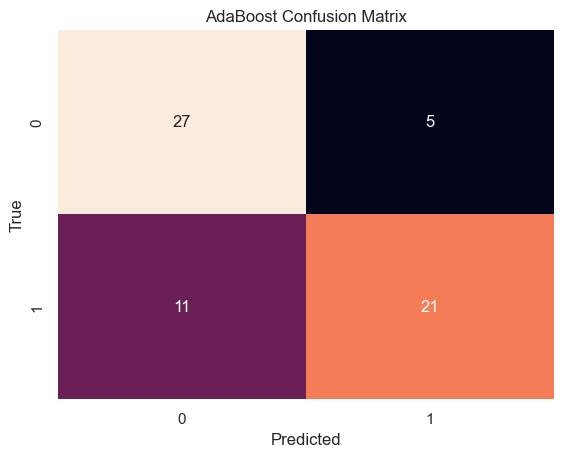

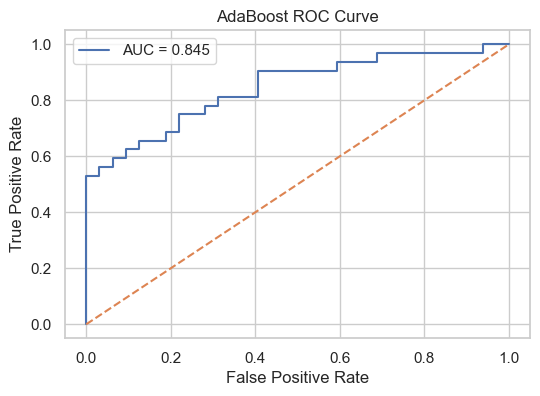

[0.637438 0.600342 0.320319 0.46139  0.467046 0.330536 0.593096 0.601171
 0.45505  0.650348 0.407533 0.519354 0.443048 0.725171 0.305918 0.67841
 0.514883 0.431767 0.456882 0.479206 0.437889 0.48434  0.736974 0.496622
 0.332526 0.498176 0.380651 0.358147 0.357822 0.412983 0.551265 0.405556
 0.602723 0.732947 0.43362  0.453246 0.5204   0.410114 0.730974 0.71166
 0.45978  0.500814 0.286245 0.665288 0.545923 0.361791 0.343676 0.403053
 0.353506 0.471904 0.542912 0.697163 0.32766  0.43264  0.740735 0.357545
 0.318201 0.534485 0.568236 0.667085 0.425322 0.314687 0.592305 0.363908]


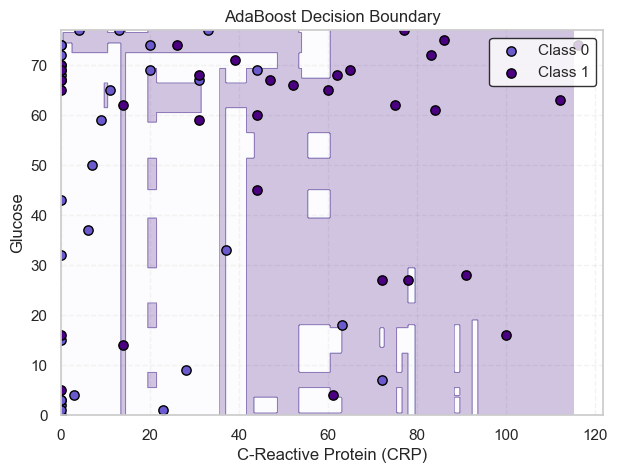

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", MinMaxScaler()),
    ("ada", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

param_grid = {
    "ada__n_estimators": [50, 100, 200, 400],
    "ada__learning_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    "ada__estimator__max_depth": [1, 2, 3]
}

gs = GridSearchCV(pipe, param_grid, cv=cv, scoring="roc_auc", n_jobs=-1)
gs.fit(X_train, y_train)

best_model = gs.best_estimator_
print("Best params:", gs.best_params_)
print("Best CV AUC:", round(gs.best_score_, 4))

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AdaBoost ROC Curve")
plt.legend()
plt.show()

print(np.round(y_proba, 6))

features_2d = ["C-Reactive Protein (CRP)", "Glucose"]

X2 = df[features_2d]
y2 = df[hedef_kolon]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

ada2 = Pipeline([
    ("scaler", MinMaxScaler()),
    ("ada", AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=gs.best_params_["ada__estimator__max_depth"],
            random_state=42
        ),
        n_estimators=gs.best_params_["ada__n_estimators"],
        learning_rate=gs.best_params_["ada__learning_rate"],
        random_state=42
    ))
])

ada2.fit(X2_train, y2_train)

x_min, x_max = X2_train.iloc[:, 0].min() - 0.05, X2_train.iloc[:, 0].max() + 0.05
y_min, y_max = X2_train.iloc[:, 1].min() - 0.05, X2_train.iloc[:, 1].max() + 0.05

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_2d)
Z = ada2.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Purples")

m0 = (y2_test == 0)
m1 = (y2_test == 1)

plt.scatter(
    X2_test.loc[m0, features_2d[0]], X2_test.loc[m0, features_2d[1]],
    c="#6A5ACD", edgecolor="black", s=45, label="Class 0"
)
plt.scatter(
    X2_test.loc[m1, features_2d[0]], X2_test.loc[m1, features_2d[1]],
    c="#4B0082", edgecolor="black", s=45, label="Class 1"
)

plt.xlabel("C-Reactive Protein (CRP)")
plt.ylabel("Glucose")
plt.title("AdaBoost Decision Boundary")
plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()

best_ada = best_model


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extma

Best params: {'mlp__activation': 'tanh', 'mlp__alpha': 1e-05, 'mlp__early_stopping': True, 'mlp__hidden_layer_sizes': (32, 16), 'mlp__learning_rate_init': 0.005, 'mlp__n_iter_no_change': 20}
Best CV AUC: 0.8095
Accuracy : 0.796875
Precision: 0.8064516129032258
Recall   : 0.78125
F1-score : 0.7936507936507936


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extm

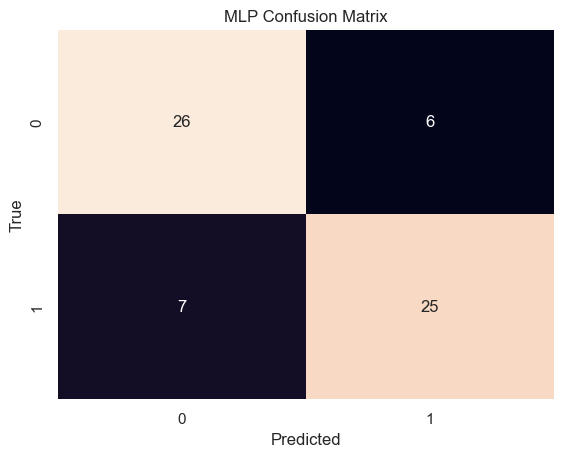

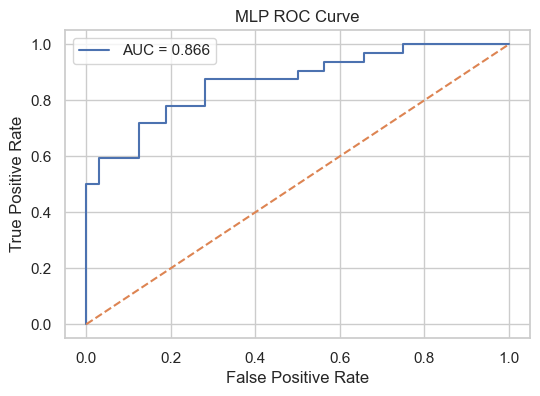

[0.588074 0.955722 0.061571 0.138809 0.066477 0.033921 0.913469 0.934746
 0.311091 0.983124 0.338572 0.6273   0.086827 0.966816 0.030482 0.930495
 0.467886 0.530702 0.340837 0.752816 0.347474 0.686684 0.980867 0.467875
 0.471864 0.56904  0.556093 0.325083 0.161091 0.343374 0.794084 0.19571
 0.958949 0.98144  0.838032 0.347038 0.58416  0.481409 0.980551 0.911878
 0.239476 0.034495 0.046234 0.930358 0.837696 0.100298 0.219577 0.252767
 0.046695 0.627138 0.589742 0.94758  0.325606 0.431225 0.958231 0.247869
 0.065247 0.637069 0.581479 0.955976 0.496667 0.074047 0.802183 0.197657]


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extma

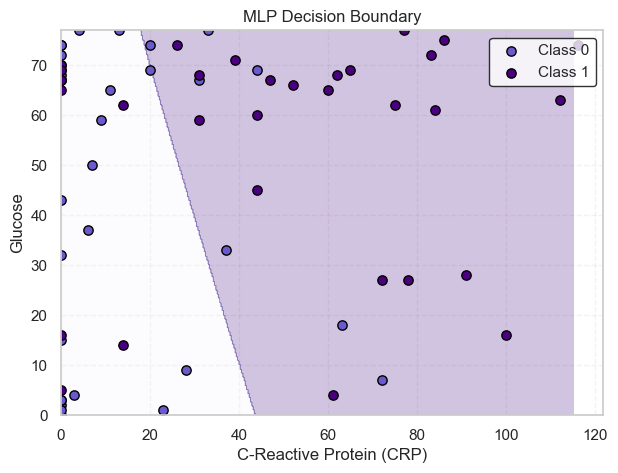

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(max_iter=3000, random_state=42))
])

param_grid = {
    "mlp__hidden_layer_sizes": [(16,), (32,), (64,), (32,16), (64,32)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__alpha": [1e-5, 1e-4, 1e-3, 1e-2],
    "mlp__learning_rate_init": [1e-4, 5e-4, 1e-3, 5e-3],
    "mlp__early_stopping": [True],
    "mlp__n_iter_no_change": [20]
}

gs = GridSearchCV(pipe, param_grid, cv=cv, scoring="roc_auc", n_jobs=-1)
gs.fit(X_train, y_train)

best_model = gs.best_estimator_
print("Best params:", gs.best_params_)
print("Best CV AUC:", round(gs.best_score_, 4))

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("MLP Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("MLP ROC Curve")
plt.legend()
plt.show()

print(np.round(y_proba, 6))

features_2d = ["C-Reactive Protein (CRP)", "Glucose"]
X2 = df[features_2d]
y2 = df[hedef_kolon]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, stratify=y2, test_size=0.2, random_state=42
)

mlp2 = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=gs.best_params_["mlp__hidden_layer_sizes"],
        activation=gs.best_params_["mlp__activation"],
        alpha=gs.best_params_["mlp__alpha"],
        learning_rate_init=gs.best_params_["mlp__learning_rate_init"],
        early_stopping=True,
        n_iter_no_change=20,
        max_iter=3000,
        random_state=42
    ))
])

mlp2.fit(X2_train, y2_train)

x_min, x_max = X2_train.iloc[:, 0].min() - 0.05, X2_train.iloc[:, 0].max() + 0.05
y_min, y_max = X2_train.iloc[:, 1].min() - 0.05, X2_train.iloc[:, 1].max() + 0.05

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 400),
    np.linspace(y_min, y_max, 400)
)

grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_2d)
Z = mlp2.predict(grid).reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Purples")

m0 = (y2_test == 0)
m1 = (y2_test == 1)

plt.scatter(
    X2_test.loc[m0, features_2d[0]], X2_test.loc[m0, features_2d[1]],
    c="#6A5ACD", edgecolor="black", s=45, label="Class 0"
)
plt.scatter(
    X2_test.loc[m1, features_2d[0]], X2_test.loc[m1, features_2d[1]],
    c="#4B0082", edgecolor="black", s=45, label="Class 1"
)

plt.xlabel("C-Reactive Protein (CRP)")
plt.ylabel("Glucose")
plt.title("MLP Decision Boundary")
plt.legend(loc="upper right", frameon=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle="--", alpha=0.25)
plt.show()

best_mlp = best_model

/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

Accuracy : 0.8125
Precision: 0.8571428571428571
Recall   : 0.75
F1-score : 0.8


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


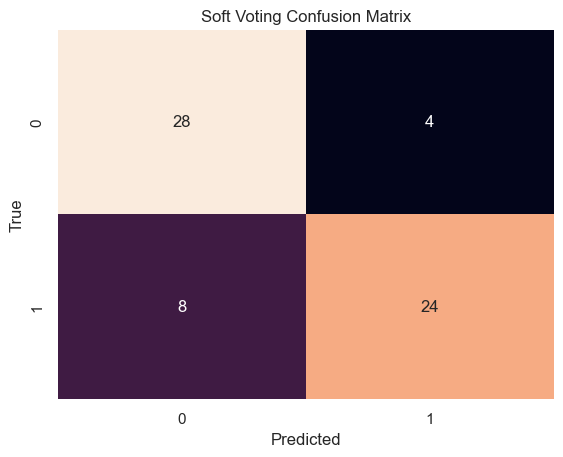

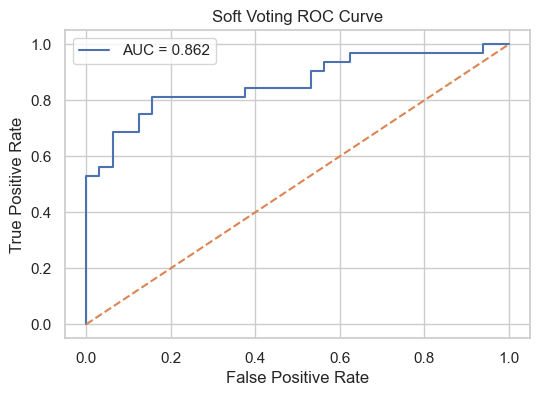

[0.773778 0.837465 0.088508 0.229448 0.281021 0.092605 0.82297  0.880312
 0.255034 0.918031 0.425896 0.725577 0.333559 0.957968 0.096809 0.884372
 0.323063 0.560906 0.442587 0.638561 0.298731 0.361555 0.961109 0.634142
 0.187851 0.663525 0.238671 0.205923 0.217743 0.359847 0.727543 0.216962
 0.799593 0.945848 0.447101 0.30167  0.650046 0.369047 0.962185 0.935207
 0.200307 0.340151 0.097486 0.882877 0.616083 0.112167 0.132097 0.307982
 0.157247 0.479107 0.71132  0.954361 0.140206 0.517079 0.940901 0.141545
 0.116512 0.49214  0.575031 0.937594 0.304464 0.09571  0.6506   0.173907]


In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

lr = Pipeline([("scaler", StandardScaler()),
               ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))])

svm = Pipeline([("scaler", MinMaxScaler()),
                ("clf", SVC(kernel="rbf", C=1, gamma="scale", probability=True))])

rf = Pipeline([("scaler", MinMaxScaler()),
               ("clf", RandomForestClassifier(n_estimators=300, random_state=42))])

gb = Pipeline([("scaler", MinMaxScaler()),
               ("clf", GradientBoostingClassifier(random_state=42))])

soft_voting = VotingClassifier(
    estimators=[("lr", lr), ("svm", svm), ("rf", rf), ("gb", gb)],
    voting="soft"
)

soft_voting.fit(X_train, y_train)

y_pred = soft_voting.predict(X_test)
y_proba = soft_voting.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Soft Voting Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Soft Voting ROC Curve")
plt.legend()
plt.show()

print(np.round(y_proba, 6))


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

Accuracy : 0.828125
Precision: 0.8620689655172413
Recall   : 0.78125
F1-score : 0.819672131147541


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


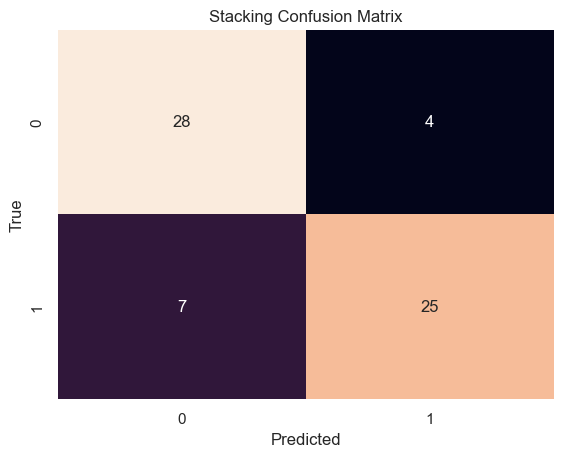

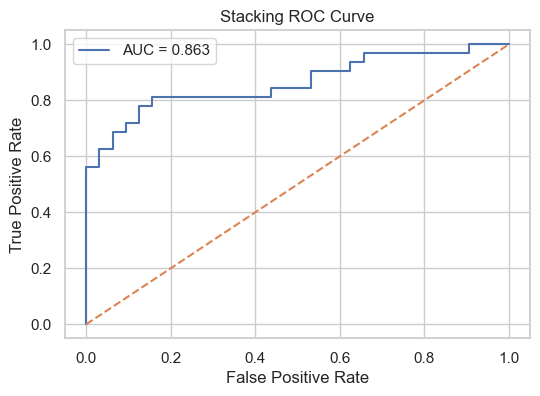

[0.827763 0.872573 0.108368 0.203651 0.236499 0.111744 0.854653 0.889852
 0.234862 0.908084 0.401697 0.764115 0.31148  0.920538 0.116519 0.894863
 0.27898  0.630628 0.427482 0.709585 0.272291 0.348101 0.921784 0.69014
 0.18318  0.704343 0.207487 0.195547 0.192642 0.34857  0.789575 0.194674
 0.848971 0.917201 0.461938 0.273023 0.688379 0.370134 0.921648 0.912069
 0.178947 0.28362  0.113149 0.88468  0.67323  0.121467 0.135442 0.288518
 0.142796 0.51628  0.77443  0.918527 0.141982 0.525529 0.915852 0.139427
 0.124506 0.496117 0.601375 0.914602 0.288406 0.113593 0.708473 0.153519]


In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

X = df.drop(columns=[hedef_kolon ])
y = df[hedef_kolon ]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

base_lr  = Pipeline([("scaler", StandardScaler()),
                     ("clf", LogisticRegression(max_iter=2000, solver="lbfgs"))])

base_svm = Pipeline([("scaler", MinMaxScaler()),
                     ("clf", SVC(kernel="rbf", C=1, gamma="scale", probability=True))])

base_rf  = Pipeline([("scaler", MinMaxScaler()),
                     ("clf", RandomForestClassifier(n_estimators=300, random_state=42))])

base_gb  = Pipeline([("scaler", MinMaxScaler()),
                     ("clf", GradientBoostingClassifier(random_state=42))])

meta = LogisticRegression(max_iter=2000)

stack = StackingClassifier(
    estimators=[("lr", base_lr), ("svm", base_svm), ("rf", base_rf), ("gb", base_gb)],
    final_estimator=meta,
    stack_method="predict_proba",
    passthrough=False,
    cv=5,
    n_jobs=-1
)

stack.fit(X_train, y_train)

y_pred = stack.predict(X_test)
y_proba = stack.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred, zero_division=0))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Stacking Confusion Matrix")
plt.show()

roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Stacking ROC Curve")
plt.legend()
plt.show()

print(np.round(y_proba, 6))


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

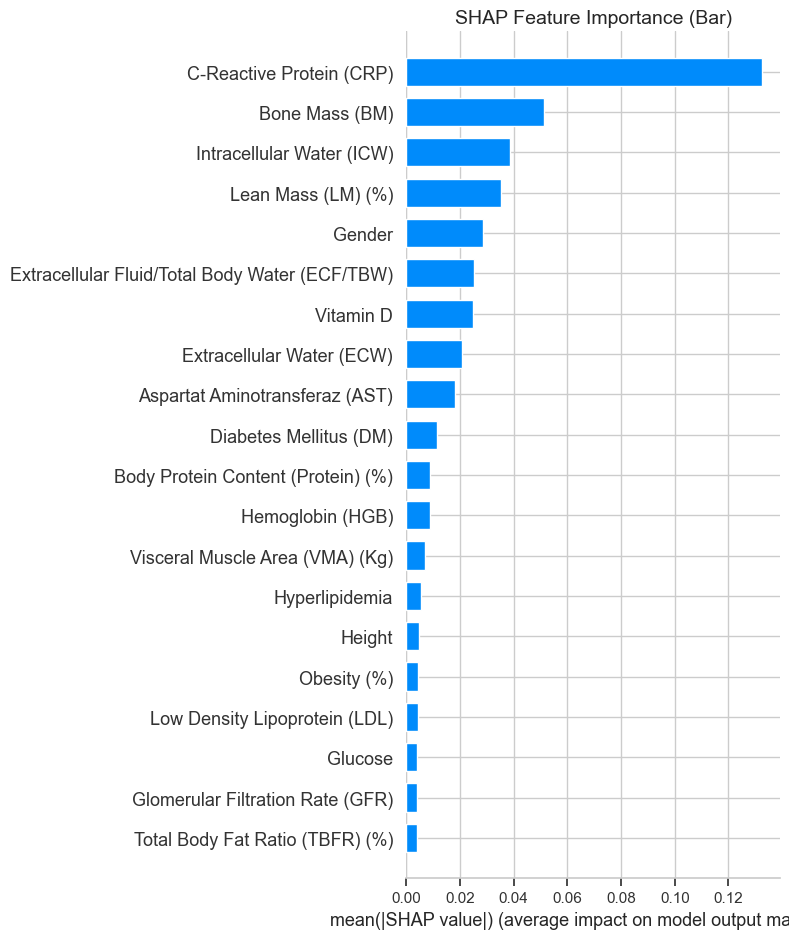

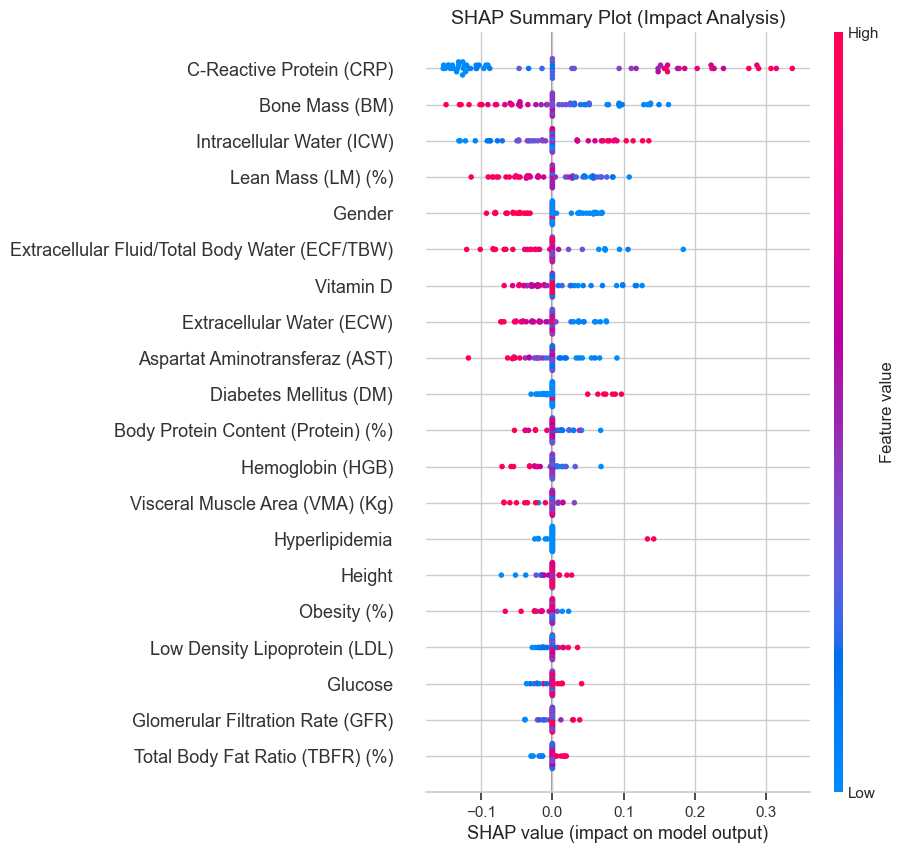

In [72]:
import numpy as np
import shap
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 10

X = df.drop(columns=[hedef_kolon])
y = df[hedef_kolon]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

stack.fit(X_train, y_train)

X_test_s = X_test.sample(min(80, len(X_test)), random_state=42)
bg = X_train.sample(min(120, len(X_train)), random_state=42)

f = lambda A: stack.predict_proba(pd.DataFrame(A, columns=X_train.columns))[:, 1]

explainer = shap.KernelExplainer(f, bg)
sv = explainer.shap_values(X_test_s, nsamples=200)

plt.figure()
shap.summary_plot(sv, X_test_s, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Bar)", fontsize=14)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(14, 10))
shap.summary_plot(sv, X_test_s, show=False)
plt.title("SHAP Summary Plot (Impact Analysis)", fontsize=14)

plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1)
plt.show()

Kullanılan modeller: ['k-NN', 'Logistic Regression', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'AdaBoost', 'Multilayer Perceptron', 'Ensemble (Voting)', 'Ensemble (Stacking)']


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 


--- RESULTS ---
                     Model  CV Mean Accuracy  Test Accuracy
0      Ensemble (Stacking)          0.784314       0.828125
1        Ensemble (Voting)          0.776471       0.812500
2        Gradient Boosting          0.788235       0.796875
3    Multilayer Perceptron          0.729412       0.796875
4      Logistic Regression          0.764706       0.781250
5   Support Vector Machine          0.749020       0.765625
6            Random Forest          0.764706       0.765625
7                 AdaBoost          0.803922       0.750000
8                     k-NN          0.647059       0.703125
9            Decision Tree          0.713725       0.656250
10             Naive Bayes          0.600000       0.593750


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


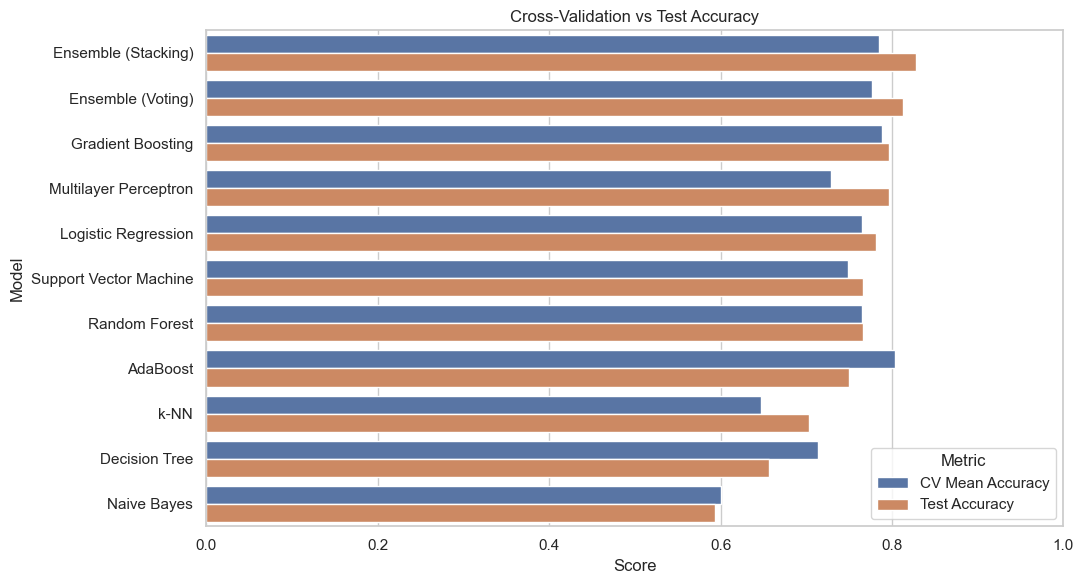

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.base import clone
from sklearn.metrics import accuracy_score

models = {}

if "final_model" in globals():
    models["k-NN"] = final_model

if "model" in globals():
    models["Logistic Regression"] = model


if "svm_model" in globals():
    models["Support Vector Machine"] = svm_model

if "dt_model" in globals():
    models["Decision Tree"] = dt_model


if "rf_fs" in globals():
    models["Random Forest"] = rf_fs
elif "rf_full" in globals():
    models["Random Forest"] = rf_full


if "nb_model" in globals():
    models["Naive Bayes"] = nb_model

if "best_gb" in globals():
    models["Gradient Boosting"] = best_gb

if "best_ada" in globals():
    models["AdaBoost"] = best_ada


if "best_mlp" in globals():
    models["Multilayer Perceptron"] = best_mlp

if "soft_voting" in globals():
    models["Ensemble (Voting)"] = soft_voting

if "stack" in globals():
    models["Ensemble (Stacking)"] = stack

if len(models) == 0:
    raise RuntimeError("Hiç model bulunamadı. Değişken isimlerini kontrol et (final_model, svm_model, best_gb, soft_voting vs.).")

print("Kullanılan modeller:", list(models.keys()))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rows = []
for name, est in models.items():
    cv_scores = cross_val_score(est, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    cv_mean = float(np.mean(cv_scores))

    m = clone(est)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    test_acc = float(accuracy_score(y_test, y_pred))

    rows.append([name, cv_mean, test_acc])

results_df = pd.DataFrame(rows, columns=["Model", "CV Mean Accuracy", "Test Accuracy"])
results_df = results_df.sort_values("Test Accuracy", ascending=False).reset_index(drop=True)

print("\n--- RESULTS ---")
print(results_df)


plot_df = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(11, 6))
sns.barplot(data=plot_df, x="Score", y="Model", hue="Metric")
plt.xlim(0, 1)
plt.title("Cross-Validation vs Test Accuracy")
plt.xlabel("Score")
plt.ylabel("Model")
plt.legend(title="Metric", loc="lower right")
plt.tight_layout()
plt.show()


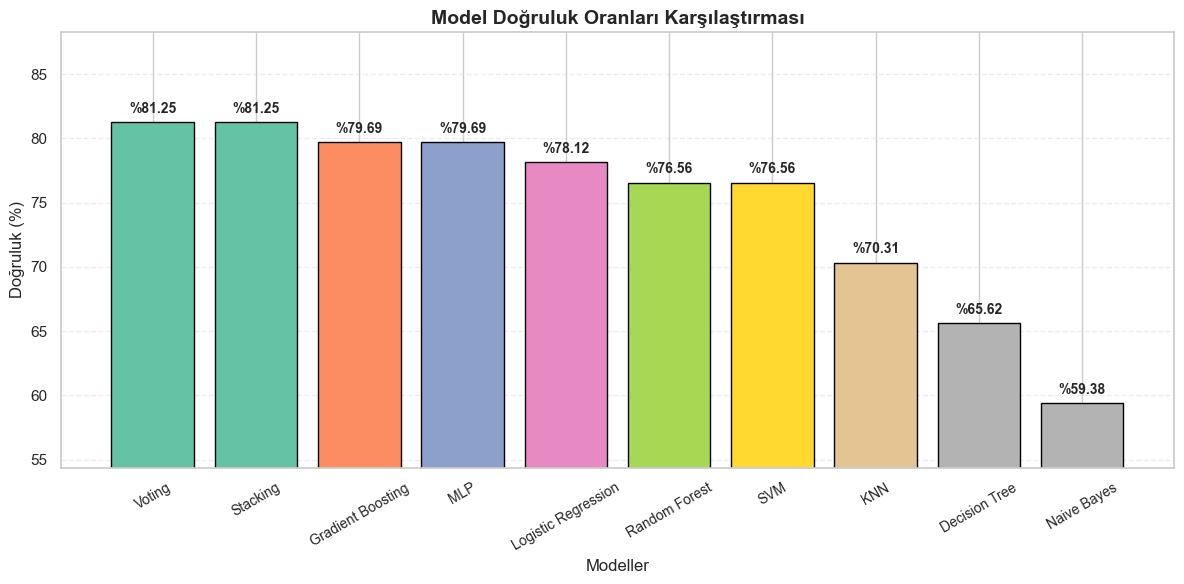

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    "Model": [
        "Voting", "Stacking", "Gradient Boosting", "MLP",
        "Logistic Regression", "Random Forest", "SVM",
        "KNN", "Decision Tree", "Naive Bayes"
    ],
    "Accuracy(%)": [81.25, 81.25, 79.69, 79.69, 78.12, 76.56, 76.56, 70.31, 65.62, 59.38]
}

acc_df = pd.DataFrame(data)

colors = plt.cm.Set2(np.linspace(0, 1, len(acc_df)))

plt.figure(figsize=(12, 6))
bars = plt.bar(
    acc_df["Model"],
    acc_df["Accuracy(%)"],
    color=colors,
    edgecolor="black"
)

plt.title("Model Doğruluk Oranları Karşılaştırması", fontsize=14, fontweight='bold')
plt.xlabel("Modeller", fontsize=12)
plt.ylabel("Doğruluk (%)", fontsize=12)

plt.xticks(fontsize=10, rotation=30)

plt.grid(True, axis="y", linestyle="--", alpha=0.35)

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + 0.5,
        f"%{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight='bold'
    )

plt.ylim(
    max(0, acc_df["Accuracy(%)"].min() - 5),
    min(100, acc_df["Accuracy(%)"].max() + 7)
)

plt.tight_layout()
plt.show()

/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise 

✅ En iyi model: Stacking | Test Accuracy: 0.8281


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extma

Importance yöntemi: permutation


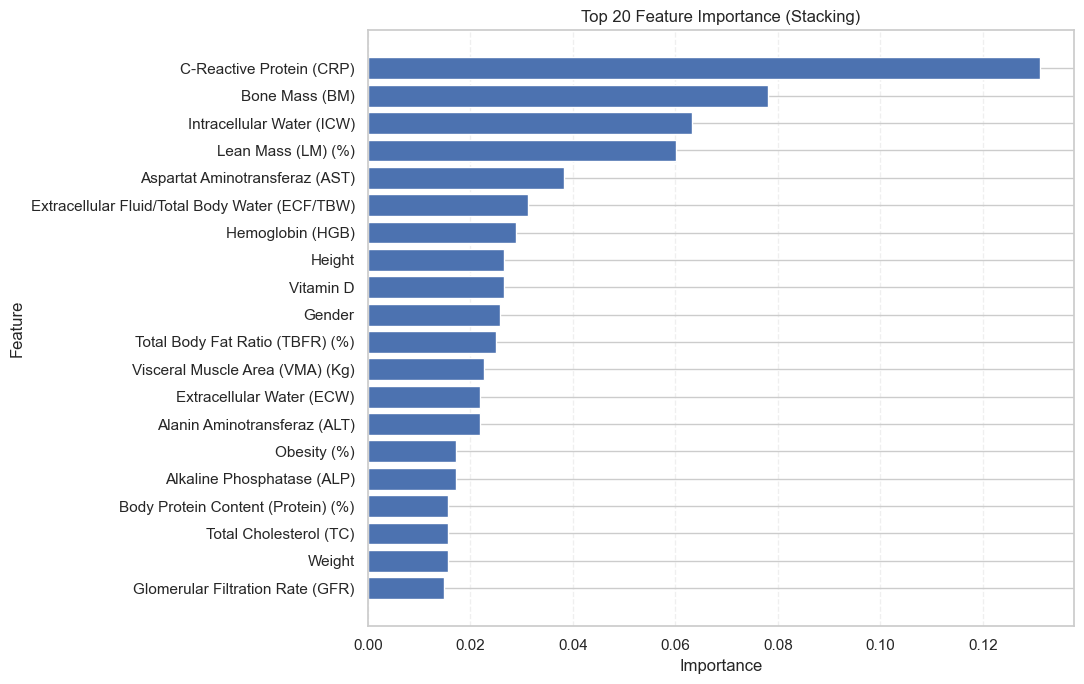

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance


models = {
    "KNN": final_model,
    "LogReg": model,
    "SVM": svm_model,
    "RandomForest": rf_fs,
    "GradientBoosting": best_gb,
    "AdaBoost": best_model,
    "MLP": best_model,
    "Voting": soft_voting,
    "Stacking": stack
}

best_name, best_est, best_acc = None, None, -1

for name, est in models.items():
    est.fit(X_train, y_train)
    acc = est.score(X_test, y_test)
    if acc > best_acc:
        best_acc = acc
        best_name, best_est = name, est

print(f"✅ En iyi model: {best_name} | Test Accuracy: {best_acc:.4f}")

def get_feature_importance(estimator, X_test, y_test):
    if hasattr(estimator, "named_steps"):
        clf = list(estimator.named_steps.values())[-1]
    else:
        clf = estimator

    if hasattr(clf, "feature_importances_"):
        imp = clf.feature_importances_
        return imp, "native"

    if hasattr(clf, "coef_"):
        imp = np.abs(clf.coef_).ravel()
        return imp, "coef_abs"

    perm = permutation_importance(
        estimator, X_test, y_test,
        n_repeats=20, random_state=42, n_jobs=-1, scoring="accuracy"
    )
    return perm.importances_mean, "permutation"

importances, method = get_feature_importance(best_est, X_test, y_test)
print("Importance yöntemi:", method)

feat_names = np.array(X.columns)
top_n = 20
idx = np.argsort(importances)[::-1][:top_n]

top_feats = feat_names[idx]
top_vals  = importances[idx]

plt.figure(figsize=(11, 7))
plt.barh(top_feats[::-1], top_vals[::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title(f"Top {top_n} Feature Importance ({best_name})")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()


/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/Huseyin/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


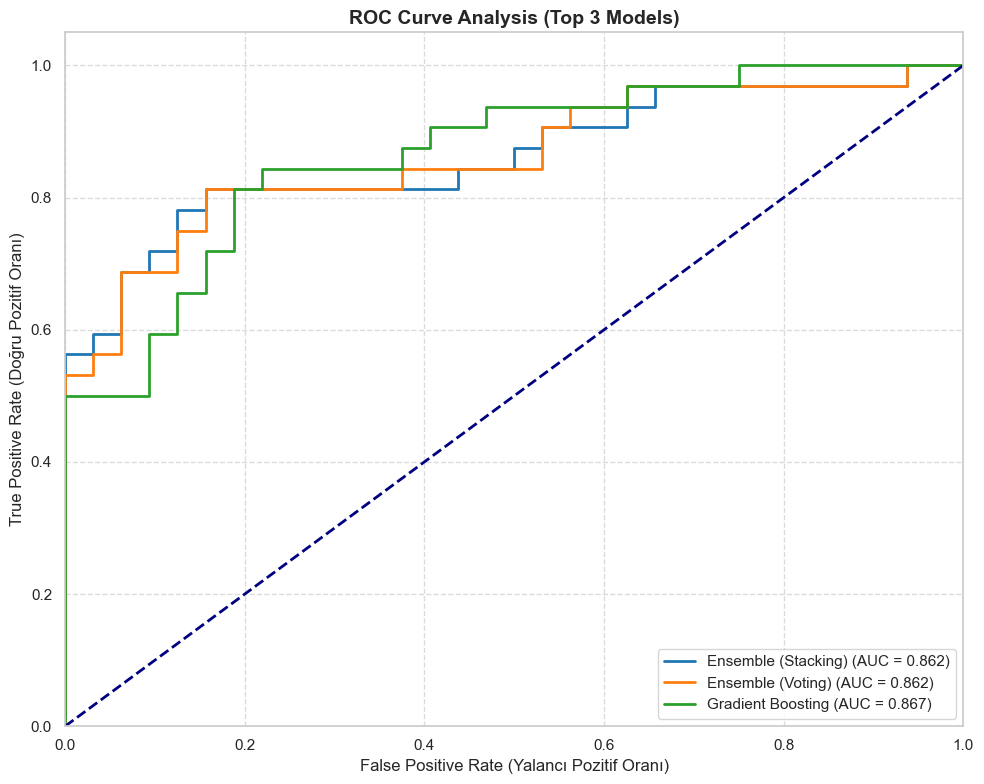

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import seaborn as sns

y_proba_stack = stack.predict_proba(X_test)[:, 1]
y_proba_voting = soft_voting.predict_proba(X_test)[:, 1]
y_proba_gb = best_gb.predict_proba(X_test)[:, 1]

models_to_plot = {
    "Ensemble (Stacking)": y_proba_stack,
    "Ensemble (Voting)": y_proba_voting,
    "Gradient Boosting": y_proba_gb
}

plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")


colors = ['#1f77b4', '#ff7f0e', '#2ca02c']


for (name, y_proba), color in zip(models_to_plot.items(), colors):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate, fontsize=12')
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Analysis (Top 3 Models)', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", frameon=True, fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()